In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
%matplotlib inline

!pip install xgboost

import warnings
warnings.filterwarnings("ignore")

## Caractéristiques

In [ ]:
##On importe les données et on concatène en un seul DF
caracteristiques_2005_2018 = []

for annee in range(2005, 2019):
    chemin = f'C:/Users/enora/Documents/01_Data_scientest/Projet_accident/Data_gouv_2005_2019/caracteristiques_{annee}.csv'
    chemin = f'data/sample_caracteristiques_{annee}.csv'
    if annee == 2009:
        df = pd.read_csv(chemin, sep='\t', encoding='latin1',  dtype={'dep': str, 'com' : str, 'hrmn' : str})
    else:
        df = pd.read_csv(chemin, sep=',', encoding='latin1',  dtype={'dep': str, 'com' : str, 'hrmn' : str})

    df['annee'] = annee
    caracteristiques_2005_2018.append(df)

caracs = pd.concat(caracteristiques_2005_2018, ignore_index=True)
caracs.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/enora/Documents/01_Data_scientest/Projet_accident/Data_gouv_2005_2019/caracteristiques_2005.csv'

## Usagers

In [ ]:
usagers_2005_2018 = []

for annee in range(2005, 2019):
    chemin = f'C:/Users/enora/Documents/01_Data_scientest/Projet_accident/Data_gouv_2005_2019/usagers_{annee}.csv'
    chemin = f'data/sample_usagers_{annee}.csv'
    df = pd.read_csv(chemin, sep=',', encoding='latin1')

    df['annee'] = annee
    usagers_2005_2018.append(df)

usagers = pd.concat(usagers_2005_2018, ignore_index=True)
usagers.head(10)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,annee
0,200500000001,1.0,1,4,1,1.0,11.0,0.0,0.0,0.0,1976.0,A01,2005
1,200500000001,1.0,1,3,2,3.0,11.0,0.0,0.0,0.0,1968.0,B02,2005
2,200500000001,2.0,2,1,1,0.0,11.0,0.0,0.0,0.0,1964.0,B02,2005
3,200500000001,4.0,2,1,1,0.0,31.0,0.0,0.0,0.0,2004.0,B02,2005
4,200500000001,5.0,2,1,1,0.0,11.0,0.0,0.0,0.0,1998.0,B02,2005
5,200500000001,3.0,2,1,2,0.0,11.0,0.0,0.0,0.0,1991.0,B02,2005
6,200500000002,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1955.0,A01,2005
7,200500000002,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1979.0,B02,2005
8,200500000003,1.0,1,1,1,1.0,21.0,0.0,0.0,0.0,1983.0,A01,2005
9,200500000003,1.0,1,3,1,1.0,21.0,0.0,0.0,0.0,1956.0,B02,2005


## lieux

In [ ]:
lieux_2005_2018 = []

for annee in range(2005, 2019):
    chemin = f'C:/Users/enora/Documents/01_Data_scientest/Projet_accident/Data_gouv_2005_2019/lieux_{annee}.csv'
    chemin = f'data/sample_lieux_{annee}.csv'
    df = pd.read_csv(chemin, sep=',', encoding='latin1', dtype={'voie': str})
    df['annee'] = annee
    lieux_2005_2018.append(df)

lieux = pd.concat(lieux_2005_2018, ignore_index=True)

lieux.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,annee
0,200500000001,3.0,00041,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,2005
1,200500000002,2.0,00041,0.0,NaN,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,100.0,1.0,0.0,5.0,0.0,2005
2,200500000003,2.0,00041,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,5.0,0.0,2005
3,200500000004,3.0,00916,0.0,NaN,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2005
4,200500000005,3.0,00110,0.0,NaN,2.0,2.0,24.0,630.0,0.0,1.0,3.0,0.0,59.0,2.0,0.0,3.0,0.0,2005


## Vehicules

In [ ]:
vehicules_2005_2018 = []

for annee in range(2005, 2018):
    chemin = f'C:/Users/enora/Documents/01_Data_scientest/Projet_accident/Data_gouv_2005_2019/vehicules_{annee}.csv'
    chemin = f'data/sample_vehicules_{annee}.csv'
    df = pd.read_csv(chemin, sep=',', encoding='latin1')

    df['annee'] = annee
    vehicules_2005_2018.append(df)

vehicules = pd.concat(vehicules_2005_2018, ignore_index=True)
vehicules.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,annee
0,200500000001,0.0,7,0,0.0,2.0,1.0,1.0,A01,2005
1,200500000001,0.0,7,0,0.0,2.0,8.0,10.0,B02,2005
2,200500000002,0.0,7,0,0.0,2.0,7.0,16.0,A01,2005
3,200500000002,0.0,2,0,0.0,2.0,1.0,1.0,B02,2005
4,200500000003,0.0,2,0,0.0,2.0,1.0,1.0,A01,2005


## On fusionne

In [ ]:
#<font color="red">C'était le code quez j'avais utilisé pour tout fusionner</font>
# correction des noms "finaux" des df (vehicules_clean, usagers_final)

# S'assurer que la clé est au bon format partout
caracs['Num_Acc'] = caracs['Num_Acc'].astype(str)
vehicules['Num_Acc'] = vehicules['Num_Acc'].astype(str)
usagers['Num_Acc'] = usagers['Num_Acc'].astype(str)
lieux['Num_Acc'] = lieux['Num_Acc'].astype(str)

In [ ]:

df_merge_accident = caracs \
    .merge(vehicules, on='Num_Acc', how='left', suffixes=('', '_veh')) \
    .merge(usagers, on='Num_Acc', how='left', suffixes=('', '_usag')) \
    .merge(lieux, on='Num_Acc', how='left', suffixes=('', '_lieu'))


In [ ]:
df_merge_accident.head()
print(f"Lignes initiales (caracs) : {len(caracs)}")
print(f"Lignes finales (df_merge) : {len(df_merge_accident)}")
display(df_merge_accident.head())
print(df_merge_accident.columns)

Lignes initiales (caracs) : 958469
Lignes finales (df_merge) : 3944537


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,annee_lieu
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,2005
1,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,2005
2,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,2005
3,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,2005
4,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,2005


Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep', 'annee', 'senc',
       'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh', 'annee_veh',
       'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp', 'actp',
       'etatp', 'an_nais', 'num_veh_usag', 'annee_usag', 'catr', 'voie', 'v1',
       'v2', 'circ', 'nbv', 'pr', 'pr1', 'vosp', 'prof', 'plan', 'lartpc',
       'larrout', 'surf', 'infra', 'situ', 'env1', 'annee_lieu'],
      dtype='object')


##### <font color="sky blue"> &nbsp;&nbsp;&nbsp;-- *Carac*  -- </font>

In [ ]:
#On regarde les doublons
doublons = df_merge_accident['Num_Acc'].duplicated().sum()
print("Il y a", doublons, "doublons dans Num_Acc \n")

#On regarde les valeurs nulles
print("\nvaleurs nulles :\n")
display(df_merge_accident.isna().sum())

Il y a 2986068 doublons dans Num_Acc 


valeurs nulles :



Num_Acc               0
an                    0
mois                  0
jour                  0
hrmn                  0
lum                   0
agg                   0
int                   0
atm                 256
col                  81
com                  16
adr              668848
gps             1973193
lat             2011006
long            2011026
dep                   0
annee                 0
senc             130472
catv             130169
occutc           130169
obs              133935
obsm             131948
choc             131343
manv             132499
num_veh          130169
annee_veh        130169
place            127259
catu                  0
grav                  0
sexe                  0
trajet              965
secu              59834
locp              59822
actp              60040
etatp             59900
an_nais            4339
num_veh_usag          0
annee_usag            0
catr                  2
voie             294754
v1              2518298
v2              

In [ ]:
##On supprime les colonnes inutiles et lignes inutiles
df_merge_accident = df_merge_accident.drop(['adr', 'gps', 'lat', 'long'], axis = 1)
df_merge_accident = df_merge_accident.dropna(subset=['atm', 'col', 'com'])

In [ ]:
df_merge_accident['dep'].value_counts()
sorted(df_merge_accident['dep'].unique())

['010',
 '020',
 '030',
 '040',
 '050',
 '060',
 '070',
 '080',
 '090',
 '10',
 '100',
 '110',
 '120',
 '130',
 '140',
 '150',
 '160',
 '170',
 '180',
 '190',
 '20',
 '201',
 '202',
 '210',
 '220',
 '230',
 '240',
 '250',
 '260',
 '270',
 '280',
 '290',
 '30',
 '300',
 '310',
 '320',
 '330',
 '340',
 '350',
 '360',
 '370',
 '380',
 '390',
 '40',
 '400',
 '410',
 '420',
 '430',
 '440',
 '450',
 '460',
 '470',
 '480',
 '490',
 '50',
 '500',
 '510',
 '520',
 '530',
 '540',
 '550',
 '560',
 '570',
 '580',
 '590',
 '60',
 '600',
 '610',
 '620',
 '630',
 '640',
 '650',
 '660',
 '670',
 '680',
 '690',
 '70',
 '700',
 '710',
 '720',
 '730',
 '740',
 '750',
 '760',
 '770',
 '780',
 '790',
 '80',
 '800',
 '810',
 '820',
 '830',
 '840',
 '850',
 '860',
 '870',
 '880',
 '890',
 '90',
 '900',
 '910',
 '920',
 '930',
 '940',
 '950',
 '971',
 '972',
 '973',
 '974',
 '976']

In [ ]:
##On supprime les lignes qui contiennent les département hors FM
Dep_suppr = ['971', '972', '973', '974', '976', '975', '977', '978', '984','986', '987', '988']

df_merge_accident = df_merge_accident[~df_merge_accident['dep'].isin(Dep_suppr)]

## On réinitialise l'index
df_merge_accident.reset_index(drop=True, inplace=True)

In [ ]:
##On vérifie 
df_merge_accident['dep'].value_counts()
sorted(df_merge_accident['dep'].unique())

['010',
 '020',
 '030',
 '040',
 '050',
 '060',
 '070',
 '080',
 '090',
 '10',
 '100',
 '110',
 '120',
 '130',
 '140',
 '150',
 '160',
 '170',
 '180',
 '190',
 '20',
 '201',
 '202',
 '210',
 '220',
 '230',
 '240',
 '250',
 '260',
 '270',
 '280',
 '290',
 '30',
 '300',
 '310',
 '320',
 '330',
 '340',
 '350',
 '360',
 '370',
 '380',
 '390',
 '40',
 '400',
 '410',
 '420',
 '430',
 '440',
 '450',
 '460',
 '470',
 '480',
 '490',
 '50',
 '500',
 '510',
 '520',
 '530',
 '540',
 '550',
 '560',
 '570',
 '580',
 '590',
 '60',
 '600',
 '610',
 '620',
 '630',
 '640',
 '650',
 '660',
 '670',
 '680',
 '690',
 '70',
 '700',
 '710',
 '720',
 '730',
 '740',
 '750',
 '760',
 '770',
 '780',
 '790',
 '80',
 '800',
 '810',
 '820',
 '830',
 '840',
 '850',
 '860',
 '870',
 '880',
 '890',
 '90',
 '900',
 '910',
 '920',
 '930',
 '940',
 '950']

In [ ]:
df_merge_accident = df_merge_accident.dropna(subset=['atm', 'col', 'com'])

In [ ]:
##Création d'une colonne date

In [ ]:
# surf: Etat de la surface :
# Normal = 1
#    1 – Normale
#    2 – Mouillée
# Défavorable = 0   
#    3 – Flaques
#    4 – Inondée
#    5 – Enneigée
#    6 – Boue
#    7 – Verglacée
#    8 – Corps gras – huile
# Inconnu = -1
#     -1 – Non renseigné
#     9– Autre

df_merge_accident["surf"] = np.where(df_merge_accident["surf"].isin([1, 2]), 1, np.where(df_merge_accident["surf"].isin([3, 4, 5, 6, 7, 8]), 0, -1))

##### <font color="sky blue"> &nbsp;&nbsp;&nbsp;-- *lieux*  -- </font>

In [ ]:
##On supprime les colonnes qui ne sont pas exploitables et les nans
df_merge_accident.drop(['vosp', 'v1', 'v2', 'pr', 'pr1', 'plan', 'env1'], axis = 1, inplace = True)
df_merge_accident.dropna(subset=['catr'], inplace=True)

In [ ]:
df_merge_accident = df_merge_accident.drop(["voie", "annee"], axis=1)

In [ ]:
#On regarde les valeurs nulles
val_nul = df_merge_accident.isna().sum()
print("\nvaleurs nulles :\n", val_nul)


valeurs nulles :
 Num_Acc              0
an                   0
mois                 0
jour                 0
hrmn                 0
lum                  0
agg                  0
int                  0
atm                  0
col                  0
com                  0
dep                  0
senc            125755
catv            125454
occutc          125454
obs             129203
obsm            127219
choc            126617
manv            127764
num_veh         125454
annee_veh       125454
place           122931
catu                 0
grav                 0
sexe                 0
trajet             944
secu             57915
locp             57764
actp             57975
etatp            57835
an_nais           4125
num_veh_usag         0
annee_usag           0
catr                 0
circ              5640
nbv              10512
prof              7198
lartpc          146547
larrout         139655
surf                 0
infra            22180
situ             20195
annee_lieu     

In [ ]:
# lartpc : NaN = pas de TPC
df_merge_accident['lartpc'] = df_merge_accident['lartpc'].fillna(0)

# larrout : NaN = inconnu / non mesuré
df_merge_accident['larrout'] = df_merge_accident['larrout'].fillna(-1)

# prof : inconnu
df_merge_accident['prof'] = df_merge_accident['prof'].fillna(-1)

# nbv : médiane 
df_merge_accident['nbv'] = df_merge_accident['nbv'].fillna(df_merge_accident['nbv'].median())

# circ : inconnu
df_merge_accident['circ'] = df_merge_accident['circ'].fillna(-1)

# infra : NaN = aucun aménagement particulier
df_merge_accident['infra'] = df_merge_accident['infra'].fillna(0)

# situ : inconnu
df_merge_accident['situ'] = df_merge_accident['situ'].fillna(-1)

##### <font color="sky blue"> &nbsp;&nbsp;&nbsp;-- *vehicules*  -- </font>

In [ ]:
## On remplace les Nans de obs et obm par -1
df_merge_accident[['obs', 'obsm']] = df_merge_accident[['obs', 'obsm']].fillna(-1)

##On vérifie 
df_merge_accident[['obs', 'obsm']].isna().sum()

## On supprime les nans de choc et manv et senc
df_merge_accident = df_merge_accident.dropna(subset=['choc', 'manv', 'senc'])

##On vérifie 
val_nul = df_merge_accident.isna().sum()
print("\nvaleurs nulles :\n", val_nul)


valeurs nulles :
 Num_Acc              0
an                   0
mois                 0
jour                 0
hrmn                 0
lum                  0
agg                  0
int                  0
atm                  0
col                  0
com                  0
dep                  0
senc                 0
catv                 0
occutc               0
obs                  0
obsm                 0
choc                 0
manv                 0
num_veh              0
annee_veh            0
place           112376
catu                 0
grav                 0
sexe                 0
trajet             724
secu             53811
locp              3729
actp              3949
etatp             3817
an_nais           4097
num_veh_usag         0
annee_usag           0
catr                 0
circ                 0
nbv                  0
prof                 0
lartpc               0
larrout              0
surf                 0
infra                0
situ                 0
annee_lieu     

In [ ]:
# On crée une colonne nb de véhicules par accident 
df_merge_accident['nb_veh'] = df_merge_accident.groupby('Num_Acc')['num_veh'].transform('nunique')
df_merge_accident.drop(columns=['num_veh'], inplace=True)
df_merge_accident.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,circ,nbv,prof,lartpc,larrout,surf,infra,situ,annee_lieu,nb_veh
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2005,2
1,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2005,2
2,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2005,2
3,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2005,2
4,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2005,2


In [ ]:
##Colonne choc, on réduit le nombre de colonnes 
## Créer les 4 familles directement
df_merge_accident['choc_avant']    = df_merge_accident['choc'].isin([1,2,3]).astype(int)
df_merge_accident['choc_arriere']  = df_merge_accident['choc'].isin([4,5,6]).astype(int)
df_merge_accident['choc_lateral']  = df_merge_accident['choc'].isin([7,8]).astype(int)
df_merge_accident['choc_multiple'] = (df_merge_accident['choc'] == 9).astype(int)

## Agréger pour avoir une ligne par accident
choc_flags = (df_merge_accident.groupby('Num_Acc', as_index=False)
                   [['choc_avant','choc_arriere','choc_lateral','choc_multiple']]
                   .max())

In [ ]:
df_merge_accident.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,larrout,surf,infra,situ,annee_lieu,nb_veh,choc_avant,choc_arriere,choc_lateral,choc_multiple
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
1,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
2,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
3,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
4,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0


In [ ]:
choc_flags.head()

,Num_Acc,choc_avant,choc_arriere,choc_lateral,choc_multiple
0,200500000001,1,0,1,0
1,200500000002,1,0,1,0
2,200500000003,1,0,0,0
3,200500000004,1,0,1,0
4,200500000005,0,0,1,0


##### <font color="sky blue"> &nbsp;&nbsp;&nbsp;-- *usagers*  -- </font>

In [ ]:
df_merge_accident.secu.value_counts(dropna=False)

secu
11.0    2236903
21.0     655131
13.0     292319
93.0     141193
0.0       76643
23.0      66183
NaN       53811
12.0      52281
22.0      31636
31.0      29258
91.0      13106
92.0      12300
10.0      10359
1.0        6128
41.0       4627
43.0       3454
42.0       2815
33.0       1556
20.0       1370
32.0       1270
2.0         429
3.0         240
90.0        161
30.0         15
40.0          3
Name: count, dtype: int64

In [ ]:
#Convertir en int64 pour garder les Nan et enlever le 0 inutile
df_merge_accident['secu'] = pd.to_numeric(df_merge_accident['secu'], errors='coerce').astype('Int64')

#Fonction pour extraire info
#Si équipement utilisé, on l'indique. Si pas utilisé on met 0, si non déterminable, on met 3.
def decode_secu(val):
    if pd.isna(val):
        return -1
    val = int(val)
    equipement = val // 10
    usage = val % 10
    if usage == 1:
        return equipement
    elif usage == 2:
        return 0
    elif usage == 3:
        return -1
    else:
        return -1  # cas imprévu

# Application
df_merge_accident['secu'] = df_merge_accident['secu'].apply(decode_secu).astype('Int64')
df_merge_accident.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,larrout,surf,infra,situ,annee_lieu,nb_veh,choc_avant,choc_arriere,choc_lateral,choc_multiple
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
1,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
2,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
3,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
4,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0


In [ ]:
df_merge_accident.secu.value_counts(dropna=False)

secu
1     2236903
2      655131
-1     647307
0      106859
3       29258
9       13106
4        4627
Name: count, dtype: Int64

In [ ]:
## On supprime colonne num_veh car on l'aura déjà travaillé dans le df véhicules
df_merge_accident = df_merge_accident.drop(columns=['num_veh_usag'])
df_merge_accident.head(10)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,larrout,surf,infra,situ,annee_lieu,nb_veh,choc_avant,choc_arriere,choc_lateral,choc_multiple
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
1,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
2,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
3,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
4,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
5,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,1,0,0,0
6,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,0,0,1,0
7,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,0,0,1,0
8,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,0,0,1,0
9,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,63.0,1,0.0,1.0,2005,2,0,0,1,0


ndex(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep', 'annee', 'senc',
       'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh', 'annee_veh',
       'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp', 'actp',
       'etatp', 'an_nais', 'num_veh_usag', 'annee_usag', 'catr', 'voie', 'v1',
       'v2', 'circ', 'nbv', 'pr', 'pr1', 'vosp', 'prof', 'plan', 'lartpc',
       'larrout', 'surf', 'infra', 'situ', 'env1', 'annee_lieu'],
      dtype='object')

In [ ]:
##On divise la colonne sexe en 2 
X = df_merge_accident[['Num_Acc','sexe']] 

enc = OneHotEncoder(handle_unknown='ignore')
X_enc = enc.fit_transform(X[['sexe']]).toarray()
col_names = enc.get_feature_names_out(['sexe'])

sexe_flags= pd.DataFrame(X_enc, columns=col_names, index=df_merge_accident.index).astype(int)

sexe_flags['Num_Acc'] = X['Num_Acc']
sexe_flags = (sexe_flags.groupby('Num_Acc', as_index=False)[col_names.tolist()].sum())

sexe_flags = sexe_flags.rename(columns={
    'sexe_1': 'Homme',
    'sexe_2': 'Femme'
})

In [ ]:
sexe_flags.head()

,Num_Acc,Homme,Femme
0,200500000001,8,4
1,200500000002,4,0
2,200500000003,4,0
3,200500000004,6,6
4,200500000005,2,0


In [ ]:
## On réencode la variable place et on test plusieurs méthodes

p = df_merge_accident.loc[:, ["Num_Acc", "place"]].copy()

##On regroupe
def regroupe_place(val):
    if val == 1:
        return "Conducteur"
    elif val == 2:
        return "Avant"
    elif val in [3,4,5,6]:
        return "Arrière"
    else:
        return "Autre"

p["place_grp"] = p["place"].apply(regroupe_place)

place_flags = pd.crosstab(p["Num_Acc"], p["place_grp"]).reset_index()

place_flags.head()

place_grp,Num_Acc,Arrière,Autre,Avant,Conducteur
0,200500000001,6,0,2,4
1,200500000002,0,0,0,4
2,200500000003,0,0,0,4
3,200500000004,0,0,3,9
4,200500000005,0,0,1,1


In [ ]:
##On modifie la variable trajet 
# Fonction de regroupement trajet
def regroupe_trajet(val):
    if pd.isna(val) or val == 0:
        return "Inconnu"
    elif val == 1:
        return "Travail"          # Domicile – travail
    elif val == 4:
        return "Professionnel"    # Utilisation pro
    elif val == 5:
        return "Loisirs"          # Promenade – loisirs
    elif val in [2, 3, 9]:
        return "Autre"            # Ecole + Courses + Autre regroupés
    else:
        return "Autre"            # Sécurité si valeur imprévue

# Appliquer le regroupement au niveau usager
df_merge_accident['trajet_grp'] = df_merge_accident['trajet'].apply(regroupe_trajet)


# Créer les dummies
trajet_dummies = pd.get_dummies(df_merge_accident['trajet_grp'], dtype=int)

# Ajouter l'identifiant accident
trajet_dummies['Num_Acc'] = df_merge_accident['Num_Acc']

# --- 4) Agréger au niveau accident
# .sum() = nombre d’usagers par catégorie
# .max() = présence d’au moins un usager dans la catégorie
trajet_flags = trajet_dummies.groupby('Num_Acc', as_index=False).sum()
# trajet_flags = trajet_dummies.groupby('Num_Acc', as_index=False).max()

# S’assurer que toutes les colonnes existent (robustesse)
for col in ["Travail", "Professionnel", "Loisirs", "Autre", "Inconnu"]:
    if col not in trajet_flags.columns:
        trajet_flags[col] = 0

trajet_flags.head()

,Num_Acc,Autre,Inconnu,Loisirs,Professionnel,Travail
0,200500000001,2,8,0,0,2
1,200500000002,0,0,4,0,0
2,200500000003,0,0,0,0,4
3,200500000004,3,3,3,0,3
4,200500000005,0,1,1,0,0


In [ ]:
df_merge_accident.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,surf,infra,situ,annee_lieu,nb_veh,choc_avant,choc_arriere,choc_lateral,choc_multiple,trajet_grp
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0.0,1.0,2005,2,1,0,0,0,Travail
1,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0.0,1.0,2005,2,1,0,0,0,Autre
2,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0.0,1.0,2005,2,1,0,0,0,Inconnu
3,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0.0,1.0,2005,2,1,0,0,0,Inconnu
4,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0.0,1.0,2005,2,1,0,0,0,Inconnu


In [ ]:
##variable an_nais
##On passe la variable en Int64
df_merge_accident['an_nais'] = df_merge_accident['an_nais'].astype('Int64')

##On nettoie
##Je passe les valeurs aberrantes en Nans

BORNE_BASSE = 1920
BORNE_HAUTE = 2018

# On crée une nouvelle colonne nettoyée
df_merge_accident['an_nais_clean'] = df_merge_accident['an_nais'].where(
    df_merge_accident['an_nais'].between(BORNE_BASSE, BORNE_HAUTE), 
    np.nan
)

# Vérification : nombre de NaN créés
print("Nombre de valeurs aberrantes transformées en NaN :", df_merge_accident['an_nais_clean'].isna().sum())

# Aperçu des colonnes
print(df_merge_accident[['an_nais','an_nais_clean']].head(20))

Nombre de valeurs aberrantes transformées en NaN : 9220
    an_nais  an_nais_clean
0      1976           1976
1      1968           1968
2      1964           1964
3      2004           2004
4      1998           1998
5      1991           1991
6      1976           1976
7      1968           1968
8      1964           1964
9      2004           2004
10     1998           1998
11     1991           1991
12     1955           1955
13     1979           1979
14     1955           1955
15     1979           1979
16     1983           1983
17     1956           1956
18     1983           1983
19     1956           1956


In [ ]:
# Calculer âge courant 
df_merge_accident['age'] = df_merge_accident['annee_usag'] - df_merge_accident['an_nais_clean']

#  Détecter les NaN (aberrantes)
mask_aberrantes = df_merge_accident['an_nais_clean'].isna()

# Médiane de l’âge
median_age = int(df_merge_accident['age'].median())
print("Âge médian courant :", median_age)

# Imputer aléatoirement autour de la médiane [median-5 ; median+5]
df_merge_accident['age_imputed'] = df_merge_accident['age'].copy()
df_merge_accident.loc[mask_aberrantes, 'age_imputed'] = np.random.randint(
    median_age - 5, 
    median_age + 6,  
    size=mask_aberrantes.sum())

# Recalculer année de naissance finale
df_merge_accident['an_nais_final'] = (df_merge_accident['annee_usag'] - df_merge_accident['age_imputed']).astype('Int64')

# Vérification 
print("Valeurs imputées :", mask_aberrantes.sum())
print(df_merge_accident.loc[mask_aberrantes, ['annee_usag','an_nais','an_nais_clean','age_imputed','an_nais_final']].head(20))

Âge médian courant : 35
Valeurs imputées : 9220
      annee_usag  an_nais  an_nais_clean  age_imputed  an_nais_final
849         2005     1915           <NA>           36           1969
959         2005     1917           <NA>           40           1965
962         2005     1917           <NA>           36           1969
1012        2005     1919           <NA>           38           1967
1145        2005     1919           <NA>           34           1971
1150        2005     1919           <NA>           38           1967
1155        2005     1919           <NA>           30           1975
1481        2005     1919           <NA>           30           1975
1512        2005     <NA>           <NA>           32           1973
1513        2005     <NA>           <NA>           35           1970
1514        2005     <NA>           <NA>           30           1975
1515        2005     <NA>           <NA>           35           1970
1664        2005     1916           <NA>           33  

In [ ]:
# On crée des classes par tranche d'âge
df_merge_accident['age'] = df_merge_accident['annee_usag'] - df_merge_accident['an_nais']

def age_group(age):
    if age < 18: 
        return "Enfant"
    elif age < 30: 
        return "Jeune"
    elif age < 60: 
        return "Adulte"
    else: 
        return "Senior"

df_merge_accident['age_grp'] = df_merge_accident['age'].apply(age_group)

print("Distribution des classes d'âge :")
print(df_merge_accident['age_grp'].value_counts(normalize=True))

# --- 3) One-hot encoding
age_dummies = pd.get_dummies(df_merge_accident['age_grp'], dtype=int)

# Rattacher l'ID accident
age_dummies['Num_Acc'] = df_merge_accident['Num_Acc']

age_flags = age_dummies.groupby('Num_Acc', as_index=False).sum()

age_flags.head()

Distribution des classes d'âge :
age_grp
Adulte    0.481188
Jeune     0.307659
Senior    0.124733
Enfant    0.086420
Name: proportion, dtype: float64


,Num_Acc,Adulte,Enfant,Jeune,Senior
0,200500000001,4,6,2,0
1,200500000002,2,0,2,0
2,200500000003,2,0,2,0
3,200500000004,6,0,0,6
4,200500000005,1,1,0,0


###### <font color="purple"> &nbsp;&nbsp;&nbsp;-- *Variable grav*  -- </font>

In [ ]:
df_merge_accident.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,choc_avant,choc_arriere,choc_lateral,choc_multiple,trajet_grp,an_nais_clean,age,age_imputed,an_nais_final,age_grp
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0,0,0,Travail,1976,29,29,1976,Jeune
1,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0,0,0,Autre,1968,37,37,1968,Adulte
2,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0,0,0,Inconnu,1964,41,41,1964,Adulte
3,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0,0,0,Inconnu,2004,1,1,2004,Enfant
4,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,1,0,0,0,Inconnu,1998,7,7,1998,Enfant


In [ ]:
label_grav = {
    1: "Indemne",
    2: "Tué",
    3: "Blessé hospitalisé",
    4: "Blessé léger"
}

u = df_merge_accident.copy()

# On réordonne les codes pour que l'échelle soit logique :
# 1 = Indemne < 2 = Blessé léger < 3 = Blessé hospitalisé < 4 = Tué
u['grav_simpl'] = u['grav'].replace({4: 2, 3: 3, 2: 4, 1: 1})

# Création d'une version ordonnée
u['grav_order'] = u['grav_simpl']

# Agrégation : une ligne par accident, on garde la gravité maximale
accident = (
    u.groupby('Num_Acc')
     .agg(grav_order_max=('grav_order', 'max'))
     .reset_index()
)

# Vérification du résultat
print(accident['grav_order_max'].value_counts().sort_index())
print(accident['grav_order_max'].map({
    1: "Indemne",
    2: "Blessé léger",
    3: "Blessé hospitalisé",
    4: "Tué"
}).value_counts())

grav_order_max
2    490825
3    334563
4     47840
Name: count, dtype: int64
grav_order_max
Blessé léger          490825
Blessé hospitalisé    334563
Tué                    47840
Name: count, dtype: int64


In [ ]:
accident['grav_order_max'].value_counts()

grav_order_max
2    490825
3    334563
4     47840
Name: count, dtype: int64

In [ ]:
u.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3693191 entries, 0 to 3695994
Data columns (total 54 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Num_Acc        object 
 1   an             int64  
 2   mois           int64  
 3   jour           int64  
 4   hrmn           object 
 5   lum            int64  
 6   agg            int64  
 7   int            int64  
 8   atm            float64
 9   col            float64
 10  com            object 
 11  dep            object 
 12  senc           float64
 13  catv           float64
 14  occutc         float64
 15  obs            float64
 16  obsm           float64
 17  choc           float64
 18  manv           float64
 19  annee_veh      float64
 20  place          float64
 21  catu           int64  
 22  grav           int64  
 23  sexe           int64  
 24  trajet         float64
 25  secu           Int64  
 26  locp           float64
 27  actp           float64
 28  etatp          float64
 29  an_nais        Int6

In [ ]:
u_bis = u.drop(['grav','sexe','trajet','place','an_nais','annee_usag','age','age_grp', 'an_nais_clean', 'an_nais_final','age_imputed','choc_multiple','choc_lateral','choc_arriere','choc_avant','trajet_grp', 
                'locp', 'actp', 'etatp', 'annee_veh', 'annee_lieu'], axis=1)

In [ ]:
print("\nvaleurs nulles :\n")
display(u_bis.isna().sum())
u_bis.head()


valeurs nulles :



Num_Acc       0
an            0
mois          0
jour          0
hrmn          0
lum           0
agg           0
int           0
atm           0
col           0
com           0
dep           0
senc          0
catv          0
occutc        0
obs           0
obsm          0
choc          0
manv          0
catu          0
secu          0
catr          0
circ          0
nbv           0
prof          0
lartpc        0
larrout       0
surf          0
infra         0
situ          0
nb_veh        0
grav_simpl    0
grav_order    0
dtype: int64

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,nbv,prof,lartpc,larrout,surf,infra,situ,nb_veh,grav_simpl,grav_order
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,1.0,0.0,63.0,1,0.0,1.0,2,2,2
1,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,1.0,0.0,63.0,1,0.0,1.0,2,3,3
2,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,1.0,0.0,63.0,1,0.0,1.0,2,1,1
3,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,1.0,0.0,63.0,1,0.0,1.0,2,1,1
4,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,1.0,0.0,63.0,1,0.0,1.0,2,1,1


In [ ]:
u_ter = u_bis.drop('grav_simpl', axis=1)

In [ ]:
u_ter = u_bis.drop('grav_order', axis=1)

In [ ]:
u_ter = u_ter.drop('choc', axis=1)

In [ ]:
u_ter.info()
u_ter.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 3693191 entries, 0 to 3695994
Data columns (total 31 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Num_Acc     object 
 1   an          int64  
 2   mois        int64  
 3   jour        int64  
 4   hrmn        object 
 5   lum         int64  
 6   agg         int64  
 7   int         int64  
 8   atm         float64
 9   col         float64
 10  com         object 
 11  dep         object 
 12  senc        float64
 13  catv        float64
 14  occutc      float64
 15  obs         float64
 16  obsm        float64
 17  manv        float64
 18  catu        int64  
 19  secu        Int64  
 20  catr        float64
 21  circ        float64
 22  nbv         float64
 23  prof        float64
 24  lartpc      float64
 25  larrout     float64
 26  surf        int64  
 27  infra       float64
 28  situ        float64
 29  nb_veh      int64  
 30  grav_simpl  int64  
dtypes: Int64(1), float64(16), int64(10), object(4)
memory usage: 9

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,circ,nbv,prof,lartpc,larrout,surf,infra,situ,nb_veh,grav_simpl
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,2
1,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,3
2,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,1
3,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,1
4,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,1
5,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,1
6,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,2
7,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,3
8,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,1
9,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,1


In [ ]:
accidents_base_unique = u_ter.drop_duplicates("Num_Acc")
accidents_base_unique.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,circ,nbv,prof,lartpc,larrout,surf,infra,situ,nb_veh,grav_simpl
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2.0,2.0,1.0,0.0,63.0,1,0.0,1.0,2,2
12,200500000002,5,1,21,1600,1,2,1,1.0,1.0,...,0.0,2.0,1.0,0.0,100.0,1,0.0,5.0,2,1
16,200500000003,5,1,21,1845,3,1,1,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1,0.0,5.0,2,1
20,200500000004,5,1,4,1615,1,1,1,1.0,5.0,...,2.0,2.0,1.0,0.0,0.0,1,0.0,1.0,3,3
32,200500000005,5,1,10,1945,3,1,1,3.0,6.0,...,2.0,2.0,1.0,0.0,59.0,1,0.0,3.0,1,3


In [ ]:
# On merge

df_features = (accidents_base_unique 
    .merge(sexe_flags,   on='Num_Acc', how='left')
    .merge(place_flags,  on='Num_Acc', how='left')
    .merge(trajet_flags, on='Num_Acc', how='left')
    .merge(age_flags,    on='Num_Acc', how='left')
    .merge(choc_flags,   on='Num_Acc', how='left'))

df_final = df_features.merge(accident[['Num_Acc','grav_order_max']], on='Num_Acc', how='inner')

In [ ]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873228 entries, 0 to 873227
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Num_Acc         873228 non-null  object 
 1   an              873228 non-null  int64  
 2   mois            873228 non-null  int64  
 3   jour            873228 non-null  int64  
 4   hrmn            873228 non-null  object 
 5   lum             873228 non-null  int64  
 6   agg             873228 non-null  int64  
 7   int             873228 non-null  int64  
 8   atm             873228 non-null  float64
 9   col             873228 non-null  float64
 10  com             873228 non-null  object 
 11  dep             873228 non-null  object 
 12  senc            873228 non-null  float64
 13  catv            873228 non-null  float64
 14  occutc          873228 non-null  float64
 15  obs             873228 non-null  float64
 16  obsm            873228 non-null  float64
 17  manv      

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,Travail,Adulte,Enfant,Jeune,Senior,choc_avant,choc_arriere,choc_lateral,choc_multiple,grav_order_max
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,2,4,6,2,0,1,0,1,0,3
1,200500000002,5,1,21,1600,1,2,1,1.0,1.0,...,0,2,0,2,0,1,0,1,0,3
2,200500000003,5,1,21,1845,3,1,1,2.0,1.0,...,4,2,0,2,0,1,0,0,0,3
3,200500000004,5,1,4,1615,1,1,1,1.0,5.0,...,3,6,0,0,6,1,0,1,0,3
4,200500000005,5,1,10,1945,3,1,1,3.0,6.0,...,0,1,1,0,0,0,0,1,0,3


In [ ]:
print(df_final["dep"].unique())   # affiche toutes les valeurs distinctes

['590' '620' '800' '020' '600' '760' '270' '350' '220' '290' '560' '140'
 '500' '610' '440' '490' '530' '720' '850' '330' '240' '400' '470' '640'
 '860' '160' '170' '790' '870' '190' '230' '310' '090' '120' '320' '460'
 '650' '810' '690' '820' '010' '070' '260' '380' '420' '730' '740' '630'
 '030' '150' '430' '570' '540' '550' '880' '670' '680' '510' '080' '100'
 '520' '210' '580' '710' '890' '250' '390' '700' '900' '130' '040' '050'
 '060' '830' '840' '340' '110' '300' '480' '660' '201' '202' '780' '910'
 '950' '770' '450' '180' '280' '360' '370' '410' '940' '750' '920' '930'
 '40' '70' '80' '30' '50' '10' '90' '20' '60']


In [ ]:
print(df_final["com"].unique())

['011' '051' '082' ... '886' '859' '897']


In [ ]:
##On test com et dep pour savoir comment les encoder et si on les garde

vars_to_test = ['com', 'dep']

for var in vars_to_test:
    print(f"\n### Variable : {var}")

    # Tableau de contingence (effectifs)
    tab = pd.crosstab(df_final[var], df_final['grav_order_max'], dropna=False)

    # Test du chi² (sans correction de Yates car > 2x2)
    chi2, p, dof, expected = chi2_contingency(tab, correction=False)

    # --- Cramér's V (bias-corrected) ---
    n = expected.sum()
    phi2 = chi2 / n
    r, k = tab.shape
    # correction de Bergsma (2013)
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    cramers_v = np.sqrt(phi2corr / max(1e-12, min((kcorr-1), (rcorr-1))))

    # Affichages
    print(tab)
    print(f"Chi² = {chi2:.2f} (ddl={dof}), p-value = {p:.4g}")
    print(f"Cramér's V (corrigé) = {cramers_v:.3f}")

    # Vérification des effectifs attendus (règle empirique : > 5)
    min_exp = expected.min()
    pct_lt5 = (expected < 5).sum() / expected.size * 100
    print(f"Min attendu = {min_exp:.2f} | % cellules < 5 = {pct_lt5:.1f}%")
    if pct_lt5 > 20:
        print("⚠️ Beaucoup de cellules avec effectif attendu < 5 : ")

    # Tableau en % par modalité (lecture)
    tab_pct = pd.crosstab(df_final[var], df_final['grav_order_max'], normalize='index') * 100
    print("\nRépartition (%) (premières lignes) :")
    # display(tab_pct.round(2))  # si tu es en notebook
    print(tab_pct.round(2).head(10).to_string())  # alternatif console


### Variable : com
grav_order_max     2     3    4
com                            
000                0     1    0
001             2781  3039  221
002             1830   908  137
003             1215  1173  162
004             4711  2626  380
..               ...   ...  ...
96                32    70   11
97                15    42    9
98                73    36    6
987                1     3    1
99                77    61   21

[1023 rows x 3 columns]
Chi² = 115126.54 (ddl=2044), p-value = 0
Cramér's V (corrigé) = 0.254
Min attendu = 0.05 | % cellules < 5 = 15.8%

Répartition (%) (premières lignes) :
grav_order_max      2       3     4
com                                
000              0.00  100.00  0.00
001             46.04   50.31  3.66
002             63.65   31.58  4.77
003             47.65   46.00  6.35
004             61.05   34.03  4.92
005             58.98   37.86  3.16
006             51.06   44.07  4.87
007             72.28   25.41  2.31
008             57.76   38.

In [ ]:
#On supprime com qui a trop de modalités et qui est liée à dep 
df_final = df_final.drop('com', axis=1)

In [ ]:
##Je garde ce df sans dep, mais il pourrait être interessant de le garder car il apporte une information géographique
df_fin = df_final.drop('dep', axis=1)

In [ ]:
##On encode hrmn
df_fin["hrmn"] = df_fin["hrmn"].astype(str).str.zfill(4)
df_fin["hrmn"] = df_fin["hrmn"].replace(["nan", "NaN", "None", ""], "0000")

df_fin["heure"] = df_fin["hrmn"].str[:2].astype(int)
df_fin["minute"] = df_fin["hrmn"].str[2:].astype(int)

df_fin = df_fin.drop(columns=["hrmn"])

In [ ]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873228 entries, 0 to 873227
Data columns (total 50 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Num_Acc         873228 non-null  object 
 1   an              873228 non-null  int64  
 2   mois            873228 non-null  int64  
 3   jour            873228 non-null  int64  
 4   lum             873228 non-null  int64  
 5   agg             873228 non-null  int64  
 6   int             873228 non-null  int64  
 7   atm             873228 non-null  float64
 8   col             873228 non-null  float64
 9   senc            873228 non-null  float64
 10  catv            873228 non-null  float64
 11  occutc          873228 non-null  float64
 12  obs             873228 non-null  float64
 13  obsm            873228 non-null  float64
 14  manv            873228 non-null  float64
 15  catu            873228 non-null  int64  
 16  secu            873228 non-null  Int64  
 17  catr      

## On crée les premiers modèles

###### <font color="purple"> &nbsp;&nbsp;&nbsp;-- *On split*  -- </font>

In [ ]:
##On a actuellement beaucoup de données, ce qui ne facilite pas la mise en place du modèle 
##On supprime minute + on supprime une colonne par groupe dans les variables One-Hot pour éviter la colinéarité

In [ ]:
##On split 
from sklearn.model_selection import train_test_split

X = df_fin.drop(columns=["grav_order_max", "Num_Acc", "minute", "an"])
y = df_fin["grav_order_max"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
##Les colonnes heure, jour et mois crée probablement une mauvais information, devraient être traités en catégorielles
# Catégorielles vs numériques
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ["mois", "jour", "heure"]
num_cols = X.columns.difference(cat_cols)

# Prétraitement catégorielles (One-Hot)
cat_tf = Pipeline([("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"))])

# ColumnTransformer
preprocess = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", cat_tf, cat_cols),
])

In [ ]:
# Fit uniquement sur le train
preprocess.fit(X_train)

# Transforme train et test
X_train_transformed = preprocess.transform(X_train)
X_test_transformed = preprocess.transform(X_test)

On remarque donc que les classes sont déséquilibrés

##### <font color="purple"> &nbsp;&nbsp;&nbsp;-- *normalisation*  -- </font>

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_transformed)

X_train_scaled = scaler.transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

In [ ]:
y_train.value_counts()

grav_order_max
2    392660
3    267650
4     38272
Name: count, dtype: int64

##### <font color="purple"> &nbsp;&nbsp;&nbsp;-- *Undersampling doux et Oversampling sur classe 3 potentiellement*  -- </font>

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Distribution avant équilibrage
print("Avant équilibrage :", Counter(y_train))

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train_scaled, y_train)

print("Après oversampling :", Counter(y_train_bal))

Avant équilibrage : Counter({2: 392660, 3: 267650, 4: 38272})
Après oversampling : Counter({2: 38272, 3: 38272, 4: 38272})


In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Distribution avant équilibrage
print("Avant équilibrage :", Counter(y_train))

# Undersampling léger
# On réduit un peu la classe majoritaire sans tomber au niveau des minoritaires
cnt = Counter(y_train)
strategy_under = {
    2: int(cnt[2] * 0.5),  
    3: int(cnt[3] * 0.8), 
    4: cnt[4]              
}

rus = RandomUnderSampler(sampling_strategy=strategy_under, random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train_scaled, y_train)
print("Après undersampling :", Counter(y_train_under))

# Oversampling (SMOTE) pour équilibrer
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = smote.fit_resample(X_train_under, y_train_under)

print("Après SMOTE :", Counter(y_train_bal))

Avant équilibrage : Counter({2: 392660, 3: 267650, 4: 38272})
Après undersampling : Counter({3: 214120, 2: 196330, 4: 38272})
Après SMOTE : Counter({2: 214120, 3: 214120, 4: 214120})


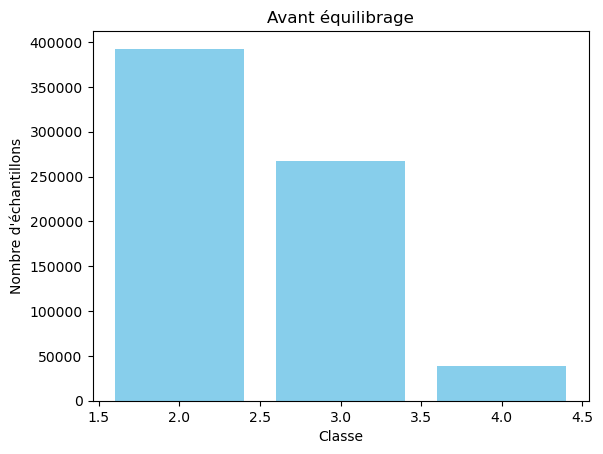

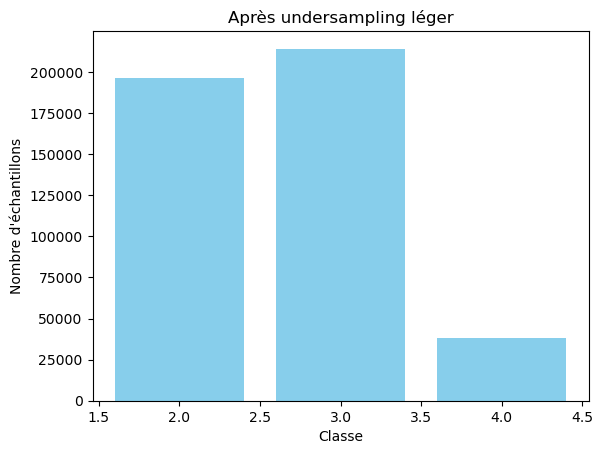

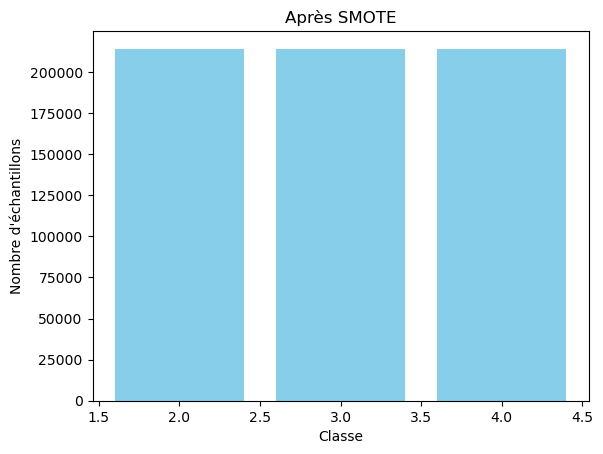

In [ ]:
import matplotlib.pyplot as plt

def plot_distribution(y, title):
    c = Counter(y)
    plt.bar(c.keys(), c.values(), color='skyblue')
    plt.title(title)
    plt.xlabel("Classe")
    plt.ylabel("Nombre d'échantillons")
    plt.show()

plot_distribution(y_train, "Avant équilibrage")
plot_distribution(y_train_under, "Après undersampling léger")
plot_distribution(y_train_bal, "Après SMOTE")

##### <font color="purple"> &nbsp;&nbsp;&nbsp;-- *Problème de mémoire*  -- </font>

In [ ]:
# Downcast en float32 / int32
X_train_bal  = X_train_bal.astype(np.float32, copy=False)
X_test_scaled = X_test_scaled.astype(np.float32, copy=False)
y_train_bal  = y_train_bal.astype(np.int32, copy=False)
y_test       = y_test.astype(np.int32, copy=False)

##### <font color="purple"> &nbsp;&nbsp;&nbsp;-- *On crée le modèle*  -- </font>

###### <font color="blue"> &nbsp;&nbsp;&nbsp;-- *Random Forest*  -- </font>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

##RandomForest
# Pipeline = préprocessing + modèle
rf = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_leaf=2, max_features="sqrt", n_jobs=1, random_state=42)

# Entraînement
rf.fit(X_train_bal, y_train_bal)

# Évaluation
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

##RandomForest
# Pipeline = préprocessing + modèle
rf = RandomForestClassifier(n_estimators=221, max_depth=12, min_samples_leaf=1, max_features="sqrt", n_jobs=-1, random_state=42, min_samples_split= 2)

# Entraînement
rf.fit(X_train_bal, y_train_bal)

# Évaluation
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.82      0.88      0.85     98165
           3       0.78      0.72      0.75     66913
           4       0.82      0.62      0.71      9568

    accuracy                           0.81    174646
   macro avg       0.81      0.74      0.77    174646
weighted avg       0.80      0.81      0.80    174646



In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(scaler, "Enora_scaler.joblib")
joblib.dump(rf, "Modele_Enora_rf.joblib")

['Modele_Enora_rf.joblib']

In [ ]:
df_fin.to_csv("df_accidents_final.csv.gz", index=False, compression='gzip')

In [ ]:
df_sample = df_fin.sample(n=20000, random_state=42)
df_sample.to_csv("df_accidents_final_sample.csv", index=False)

In [ ]:
##Version avec test hyperparamètres
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint

rf = RandomForestClassifier(
    random_state=42,  # utile pour déséquilibre
    n_jobs=-1
)

# Grille minimaliste pour test rapide
param_distrib = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 15),
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distrib,
    n_iter=8,                 # rapide (essaye 8 combinaisons aléatoires)
    scoring='f1_macro',       # adapte si tu veux optimiser autre chose
    cv=2,                     # 2 folds = rapide
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train_bal, y_train_bal)

best_rf = search.best_estimator_

y_pred = best_rf.predict(X_test_scaled)

print("✅ Best params:", search.best_params_)
print("✅ F1_macro CV:", search.best_score_)
print("✅ Report sur test set :")
print(classification_report(y_test, y_pred))

###### <font color="blue"> &nbsp;&nbsp;&nbsp;-- *Logistic regression*  -- </font>

In [ ]:
from sklearn.linear_model import LogisticRegression

##Logistic régression 
pipe_lr = LogisticRegression(C=0.5, solver='saga', penalty='l2', multi_class='multinomial', max_iter=1000)

pipe_lr.fit(X_train_bal, y_train_bal)
y_pred_lr = pipe_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

###### <font color="blue"> &nbsp;&nbsp;&nbsp;-- *Hit_gradient_boosting*  -- </font>

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # si <1.0
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(
    max_depth=8, learning_rate=0.1, max_iter=300, random_state=42
)
hgb.fit(X_train_bal, y_train_bal)
y_pred = hgb.predict(X_test_scaled)

In [ ]:
# Évaluation
y_pred = hgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform

# Modèle de base
hgb = HistGradientBoostingClassifier(random_state=42)

# Grille d’hyperparamètres raisonnable pour test rapide
param_dist = {
    "learning_rate": uniform(0.05, 0.1),
    "max_iter": randint(100, 200),
    "max_depth": randint(3, 6),
    "min_samples_leaf": randint(20, 60)
}

# RandomizedSearch
search = RandomizedSearchCV(
    hgb,
    param_distributions=param_dist,
    n_iter=5,        # tu peux monter à 20-50 pour des essais plus poussés
    cv=2,
    scoring="f1_macro",
    n_jobs=1,
    verbose=2,
    random_state=42
)

search.fit(X_train_bal, y_train_bal)

# Évaluation
best_hgb = search.best_estimator_
y_pred = best_hgb.predict(X_test_scaled)

print("✅ Best params:", search.best_params_)
print("✅ Best CV F1_macro:", search.best_score_)
print("✅ Test set report :")
print(classification_report(y_test, y_pred))

###### <font color="blue"> &nbsp;&nbsp;&nbsp;-- *EasyEnsembleClassifier*  -- </font>

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report, f1_score

eec = EasyEnsembleClassifier(n_estimators=10, random_state=42, n_jobs=1)
eec.fit(X_train_scaled, y_train)
y_pred = eec.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("F1_macro:", f1_score(y_test, y_pred, average="macro"))

###### <font color="blue"> &nbsp;&nbsp;&nbsp;-- *BalancedRandomForest*  -- </font>

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(
    n_estimators=600, max_depth=None, max_features="sqrt",
    sampling_strategy="auto", random_state=42, n_jobs=1
)
brf.fit(X_train_scaled, y_train)
y_pred = brf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

###### <font color="blue"> &nbsp;&nbsp;&nbsp;-- *XGBoost*  -- </font>

In [ ]:
# --- Étape 1 : Remapper les classes en [0, 1, 2]
label_map = {1: 0, 2: 1, 3: 2}
label_map_inv = {0: 1, 1: 2, 2: 3}

y_train_xgb = y_train.map(label_map)
y_test_xgb  = y_test.map(label_map)

# --- Étape 2 : Surpondération classe 3 (index 2 maintenant)
w = compute_sample_weight("balanced", y_train_xgb)
w[y_train_xgb == 2] *= 4.0  # adapte ce facteur si besoin

# --- Étape 3 : Modèle XGBoost
xgb = XGBClassifier(
    objective="multi:softprob", num_class=3, tree_method="hist",
    n_estimators=1000, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42, n_jobs=1
)
xgb.fit(X_train_scaled, y_train_xgb, sample_weight=w)

# --- Étape 4 : Recherche du meilleur seuil pour la classe 3
proba = xgb.predict_proba(X_test_scaled)
y_argmax = proba.argmax(axis=1)

best_t, best_f1, best_pred = 0.5, -1, None
for t in np.arange(0.35, 0.80, 0.02):
    yp = y_argmax.copy()
    yp[proba[:, 2] >= t] = 2  # forcer prédiction classe 3 si proba ≥ seuil
    f1m = f1_score(y_test_xgb, yp, average="macro")
    if f1m > best_f1:
        best_t, best_f1, best_pred = t, f1m, yp

# --- Étape 5 : Remapping des prédictions pour affichage clair
best_pred_final = np.vectorize(label_map_inv.get)(best_pred)

print("Seuil classe 3 choisi:", best_t, "F1_macro:", best_f1)
print(classification_report(y_test, best_pred_final))

In [ ]:
##On test hyperparamètre
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report
from scipy.stats import randint, uniform

# --- Étape 1 : Remapper les classes en [0, 1, 2]
label_map = {1: 0, 2: 1, 3: 2}
label_map_inv = {0: 1, 1: 2, 2: 3}

y_train_xgb = y_train.map(label_map)
y_test_xgb = y_test.map(label_map)

# --- Étape 2 : Surpondération classe 3 (index 2 maintenant)
w = compute_sample_weight("balanced", y_train_xgb)
w[y_train_xgb == 2] *= 4.0  # ajuste ici si besoin
xgb_test = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    tree_method="hist",
    random_state=42,
    n_jobs=1  # si peu de RAM ; sinon -1
)

# --- Étape 4 : Grille d’hyperparamètres (rapide)
param_distrib = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 6),
    'learning_rate': uniform(0.05, 0.15),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

search = RandomizedSearchCV(
    estimator=xgb_test,
    param_distributions=param_distrib,
    n_iter=8,  # tu peux monter à 20+ si besoin
    scoring='f1_macro',
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# --- Étape 5 : Entraînement avec poids
search.fit(X_train_scaled, y_train_xgb, sample_weight=w)
best_xgb = search.best_estimator_


# --- Étape 6 : Prédictions + seuil optimisé pour classe 3
proba = best_xgb.predict_proba(X_test_scaled)
y_argmax = proba.argmax(axis=1)

best_t, best_f1, best_pred = 0.5, -1, None
for t in np.arange(0.35, 0.80, 0.02):  # seuils testés
    yp = y_argmax.copy()
    yp[proba[:, 2] >= t] = 2
    f1m = f1_score(y_test_xgb, yp, average="macro")
    if f1m > best_f1:
        best_t, best_f1, best_pred = t, f1m, yp

# --- Étape 7 : Rapport final
best_pred_final = np.vectorize(label_map_inv.get)(best_pred)

print("✅ Seuil classe 3 choisi:", best_t)
print("✅ F1_macro:", best_f1)
print("✅ Meilleurs paramètres :", search.best_params_)
print("✅ Rapport de classification :")
print(classification_report(y_test, best_pred_final))

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [ ]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import f1_score, classification_report
import numpy as np

# -- Remap des labels
label_map = {1: 0, 2: 1, 3: 2}
label_map_inv = {0: 1, 1: 2, 2: 3}
y_train_xgb = y_train.map(label_map)
y_test_xgb = y_test.map(label_map)

# -- Poids équilibrés + surpondération classe 3
w = compute_sample_weight("balanced", y_train_xgb)
w[y_train_xgb == 2] *= 4.0

# -- Modèle XGBoost avec tes meilleurs paramètres
xgb = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    n_estimators=289,
    max_depth=5,
    learning_rate=float(0.19606332782621888),
    subsample=float(0.7271819303598462),
    colsample_bytree=float(0.7139996989640846)
)

# -- Entraînement
xgb.fit(X_train_scaled, y_train_xgb, sample_weight=w)

# -- Prédictions + Ajustement seuil classe 3
proba = xgb.predict_proba(X_test_scaled)
y_argmax = proba.argmax(axis=1)

best_t, best_f1, best_pred = 0.5, -1, None
for t in np.arange(0.35, 0.80, 0.02):
    yp = y_argmax.copy()
    yp[proba[:, 2] >= t] = 2
    f1m = f1_score(y_test_xgb, yp, average="macro")
    if f1m > best_f1:
        best_t, best_f1, best_pred = t, f1m, yp

# -- Remap final pour affichage clair
best_pred_final = np.vectorize(label_map_inv.get)(best_pred)

# -- Résultats
print("✅ Seuil classe 3 choisi:", best_t)
print("✅ F1_macro:", best_f1)
print(classification_report(y_test, best_pred_final))

In [ ]:
##On test un voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# 1. Recrée tes modèles avec les meilleurs hyperparamètres trouvés
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

# RandomForest
rf = RandomForestClassifier(
    n_estimators=221,
    max_depth=12,
    min_samples_leaf=1,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# HistGradientBoosting
hgb = HistGradientBoostingClassifier(
    learning_rate=0.10986584841907366,
    max_depth=5,
    max_iter=182,
    min_samples_leaf=42,
    random_state=42
)

# XGBoost
xgb = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    tree_method="hist",
    n_estimators=289,
    learning_rate=0.19606332782621888,
    max_depth=5,
    subsample=0.7271819303598462,
    colsample_bytree=0.7139996989640846,
    random_state=42,
    n_jobs=1
)

# 2. VotingClassifier (voting='soft' pour utiliser les probabilités)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('hgb', hgb),
        ('xgb', xgb)
    ],
    voting='soft',        # utilise predict_proba pour pondérer les votes
    n_jobs=-1
)

# 3. Entraînement sur le set d'entraînement équilibré
voting_clf.fit(X_train_bal, y_train_bal)

# 4. Prédiction sur le test set
y_pred = voting_clf.predict(X_test_scaled)

# 5. Rapport de classification
print("✅ Résultats VotingClassifier :")
print(classification_report(y_test, y_pred))

On va prioriser le RandomForestClassifier, XGBoost et HistGradientBoosting. On va commencer par essayer d'optimiser les hyperparamètres